In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:

df = pd.read_csv("./data_set_1.csv", sep=",", engine="python", on_bad_lines="skip")


In [ ]:
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10090151,K07985.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,-1.757,0.068,2.763,0.074,2.344,0.072,-1.756,0.068,2.929,0.072
9560,9561,10128825,K07986.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.497,0,...,-0.250,0.490,0.780,0.460,0.500,0.400,-0.180,0.470,0.530,0.470
9561,9562,10147276,K07987.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.021,0,...,-3.650,0.260,5.000,0.220,3.380,0.160,-3.890,0.260,5.160,0.220
9562,9563,10155286,K07988.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.092,0,...,1.320,0.670,1.690,0.530,1.450,0.110,1.370,0.660,2.000,0.460


/Users/felixbos/miniconda3/envs/AI_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


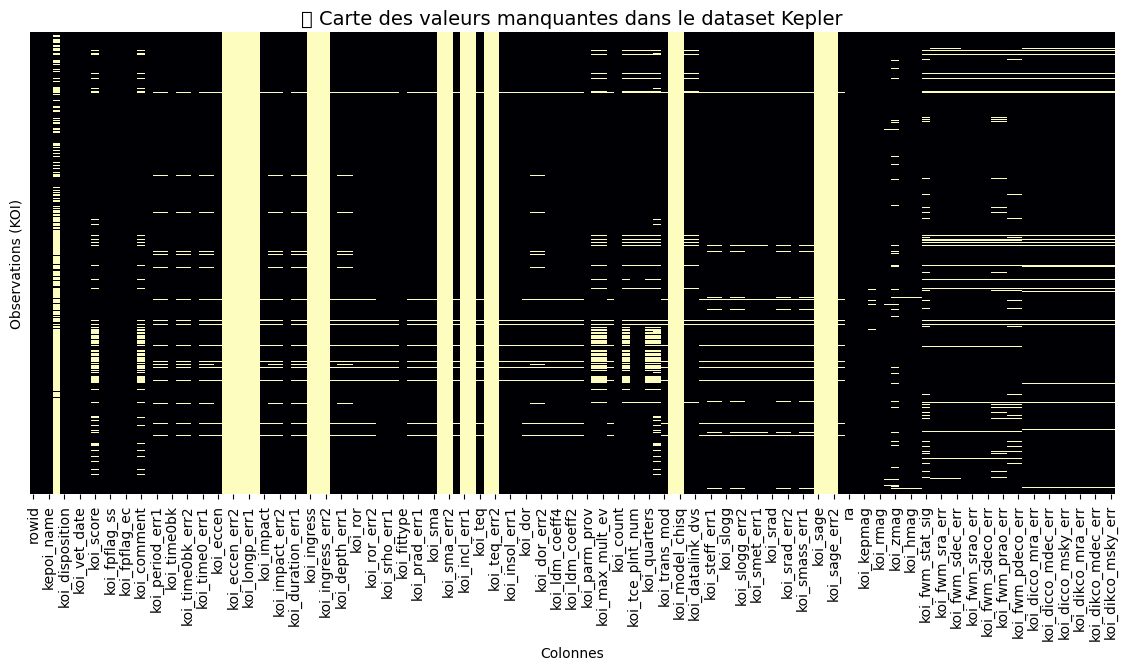

In [19]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isna(), 
            cmap="magma",          # Palette de couleurs
            cbar=False,            # Pas de barre de couleur inutile
            yticklabels=False)     # Masquer les indices de ligne
plt.title("🪐 Carte des valeurs manquantes dans le dataset Kepler", fontsize=14)
plt.xlabel("Colonnes")
plt.ylabel("Observations (KOI)")
plt.show()


In [23]:
df.shape

(9564, 141)

In [21]:
target = "koi_disposition"
identification_cols = [
    "kepid",          # ID unique dans le catalogue Kepler
    "kepoi_name",     # Nom du KOI (Kepler Object of Interest)
    "kepler_name",    # Nom officiel (ex: Kepler-22b)
    "koi_vet_stat",   # Statut du vetting (ACTIVE/DONE)
    "koi_vet_date"    # Date de dernière mise à jour
]
project_disposition_cols = [
    "koi_pdisposition",  # Disposition selon les données Kepler
    "koi_score",         # Score de confiance (0–1)
    "koi_fpflag_nt",     # Non transit-like
    "koi_fpflag_ss",     # Stellar eclipse flag
    "koi_fpflag_co",     # Centroid offset flag
    "koi_fpflag_ec",     # Ephemeris contamination flag
    "koi_disp_prov",     # Provenance de la disposition
]

transit_features = [
    "koi_period",       # Période orbitale (jours)
    "koi_time0bk",      # Époque du premier transit (BJD - offset)
    "koi_impact",       # Paramètre d’impact (distance projetée centre–centre)
    "koi_duration",     # Durée du transit (heures)
    "koi_ingress",      # Durée d’entrée du transit (heures)
    "koi_depth",        # Profondeur du transit (ppm)
    "koi_ror",          # Ratio rayon planète / rayon étoile
    "koi_srho",         # Densité stellaire ajustée
    "koi_prad",         # Rayon planétaire (Terres)
    "koi_sma",          # Demi-grand axe orbital (UA)
    "koi_incl",         # Inclinaison orbitale (degrés)
    "koi_teq",          # Température d’équilibre (K)
    "koi_insol",        # Flux incident relatif à la Terre
    "koi_dor"           # Distance planète-étoile / rayon étoile
]
signal_features = [
    "koi_model_snr",      # Signal-to-noise ratio du transit
    "koi_max_sngle_ev",   # Single Event Statistic max
    "koi_max_mult_ev",    # Multiple Event Statistic max
    "koi_model_chisq",    # Qualité de l’ajustement du modèle
    "koi_count",          # Nombre de planètes détectées dans le système
    "koi_num_transits"    # Nombre total de transits observés
]

stellar_features = [
    "koi_steff",   # Température effective (K)
    "koi_slogg",   # Gravité de surface log10(cm/s²)
    "koi_smet",    # Métallicité [Fe/H]
    "koi_srad",    # Rayon stellaire (Soleils)
    "koi_smass",   # Masse stellaire (Soleils)
    "koi_sage"     # Âge stellaire (Gyr)
]

photometric_features = [
    "ra", "dec",          # Coordonnées
    "koi_kepmag",         # Magnitude Kepler
    "koi_gmag", "koi_rmag", "koi_imag", "koi_zmag",  # Magnitudes KIC
    "koi_jmag", "koi_hmag", "koi_kmag"               # Magnitudes 2MASS
]

centroid_features = [
    "koi_fwm_sra", "koi_fwm_sdec", "koi_fwm_srao", "koi_fwm_sdeco",
    "koi_fwm_prao", "koi_fwm_pdeco", "koi_fwm_stat_sig",
    "koi_dicco_mra", "koi_dicco_mdec", "koi_dicco_msky",
    "koi_dikco_mra", "koi_dikco_mdec", "koi_dikco_msky"
]

all_features = (
    transit_features
    + signal_features
    + stellar_features
    + photometric_features
    + centroid_features
)


## Traitement des données

In [34]:
from narwhals import col
import pandas as pd

def analyse_nan(df: pd.DataFrame, seuil: float = 20.0) -> pd.DataFrame:
    """
    Analyse les valeurs manquantes d'un DataFrame et affiche celles dépassant un certain seuil.
    
    Paramètres
    ----------
    df : pd.DataFrame
        Le DataFrame à analyser.
    seuil : float, optionnel
        Pourcentage minimal de NaN pour être affiché (par défaut 20%).

    Retour
    ------
    pd.DataFrame
        Tableau des colonnes avec le nombre et la proportion (%) de NaN.
    """
    total_rows = len(df)
    
    nan_count = df.isna().sum()
    nan_ratio = (nan_count / total_rows) * 100
    
    resultat = pd.DataFrame({
        'NaN_count': nan_count,
        'NaN_%': nan_ratio.round(2)
    }).sort_values(by='NaN_%', ascending=False)
    
    print(f"\nNombre total de lignes : {total_rows}")
    print(f"Seuil de détection : {seuil}%\n")
    
    colonnes_filtrees = resultat[resultat['NaN_%'] > seuil]
    
    if colonnes_filtrees.empty:
        print("✅ Aucune colonne ne dépasse le seuil spécifié.")
    else:
        print("⚠️ Colonnes avec trop de valeurs manquantes :\n")
        print(len(resultat) - len(colonnes_filtrees))
    
    return resultat, colonnes_filtrees


In [35]:
analyse_nan(df, 0.1)


Nombre total de lignes : 9564
Seuil de détection : 0.1%

⚠️ Colonnes avec trop de valeurs manquantes :

23


(                  NaN_count  NaN_%
 koi_model_dof          9564  100.0
 koi_teq_err1           9564  100.0
 koi_ingress_err1       9564  100.0
 koi_ingress            9564  100.0
 koi_sage_err2          9564  100.0
 ...                     ...    ...
 koi_duration              0    0.0
 kepid                     0    0.0
 ra                        0    0.0
 dec                       0    0.0
 rowid                     0    0.0
 
 [141 rows x 2 columns],
                   NaN_count   NaN_%
 koi_model_dof          9564  100.00
 koi_teq_err1           9564  100.00
 koi_ingress_err1       9564  100.00
 koi_ingress            9564  100.00
 koi_sage_err2          9564  100.00
 ...                     ...     ...
 koi_imag                154    1.61
 koi_gmag                 41    0.43
 koi_jmag                 25    0.26
 koi_hmag                 25    0.26
 koi_kmag                 25    0.26
 
 [118 rows x 2 columns])

In [36]:

cols_str = df.select_dtypes(include=['object', 'string']).columns.tolist()

print(f"🧩 Nombre de colonnes texte : {len(cols_str)}\n")

if cols_str:
    print("Colonnes de type texte détectées :")
    for col in cols_str:
        print(f" - {col}")
else:
    print("✅ Aucune colonne texte détectée.")

cols_str

🧩 Nombre de colonnes texte : 17

Colonnes de type texte détectées :
 - kepoi_name
 - kepler_name
 - koi_disposition
 - koi_vet_stat
 - koi_vet_date
 - koi_pdisposition
 - koi_disp_prov
 - koi_comment
 - koi_fittype
 - koi_limbdark_mod
 - koi_parm_prov
 - koi_tce_delivname
 - koi_quarters
 - koi_trans_mod
 - koi_datalink_dvr
 - koi_datalink_dvs
 - koi_sparprov


['kepoi_name',
 'kepler_name',
 'koi_disposition',
 'koi_vet_stat',
 'koi_vet_date',
 'koi_pdisposition',
 'koi_disp_prov',
 'koi_comment',
 'koi_fittype',
 'koi_limbdark_mod',
 'koi_parm_prov',
 'koi_tce_delivname',
 'koi_quarters',
 'koi_trans_mod',
 'koi_datalink_dvr',
 'koi_datalink_dvs',
 'koi_sparprov']